In [11]:
import numpy as np
import pandas as pd

# Données initiales
data = {
    "A": [4, 6, 8],
    "B": [5, 7, 0],
}

# Création du DataFrame
A = pd.DataFrame(data)

# Étape 1 : Centrer la matrice
A_centered = A - np.mean(A, axis=0)  

# Étape 2 : Calculer la matrice de variance-covariance
cov_matrix = np.cov(A_centered.T)  # Transposé pour aligner les variables sur les colonnes

# Étape 3 : Calculer la matrice de corrélation
corr_matrix = np.corrcoef(A.T)

# Étape 4 : Calculer les valeurs propres et les vecteurs propres de la matrice de variance-covariance
valeurs_propres, vecteurs_propres = np.linalg.eig(corr_matrix)

# Afficher les résultats
print("Matrice Centrée :")
print(A_centered)

print("\nMatrice de Variance-Covariance :")
print(cov_matrix)

print("\nMatrice de Corrélation :")
print(corr_matrix)

print("\nValeurs Propres :")
print(valeurs_propres)

print("\nVecteurs Propres :")
print(vecteurs_propres)


Matrice Centrée :
     A    B
0 -2.0  1.0
1  0.0  3.0
2  2.0 -4.0

Matrice de Variance-Covariance :
[[ 4. -5.]
 [-5. 13.]]

Matrice de Corrélation :
[[ 1.         -0.69337525]
 [-0.69337525  1.        ]]

Valeurs Propres :
[1.69337525 0.30662475]

Vecteurs Propres :
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


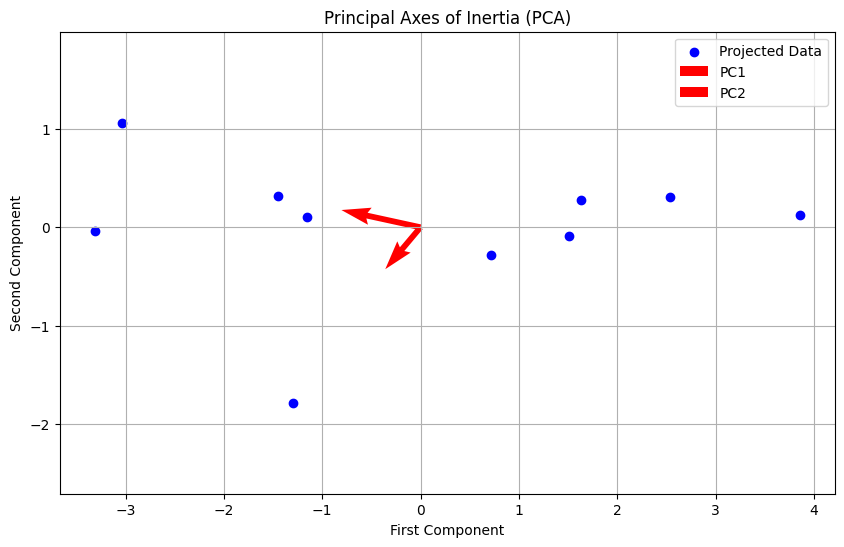

Valeurs propres (Eigenvalues):
[5.20650084 0.47024    0.20325737 0.0732618  0.03447331 0.01226668]

Vecteurs propres (Eigenvectors):
[[-0.35845621 -0.80445934 -0.33224303 -0.13962223  0.27426763 -0.13875082]
 [-0.42618727  0.17550103 -0.00669788 -0.62435948 -0.53616062 -0.33200297]
 [-0.38939722  0.45191449 -0.73946844  0.1728043   0.12419439  0.22813145]
 [-0.4287241  -0.076358    0.38796418 -0.16156686  0.00615438  0.79605726]
 [-0.42449705 -0.13529698  0.18115199  0.73100304 -0.45013154 -0.17803676]
 [-0.41742217  0.30607521  0.39927921  0.01871481  0.6474786  -0.39124676]]

New coordinates in principal axes basis (PCA-transformed data):
[[ 1.62863761e+00  2.78617306e-01 -8.02917163e-01 -2.36020736e-01
   1.00047668e-01  1.77502495e-01]
 [-1.45335603e+00  3.22188214e-01 -3.67068728e-01 -3.93995652e-01
   6.41490053e-02 -1.95250554e-01]
 [-1.30155623e+00 -1.78326360e+00 -2.98061686e-02 -1.62947969e-01
  -4.13945399e-02  7.69233336e-02]
 [ 3.85471717e+00  1.21180941e-01  8.02394787e-0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial data
data = {
    "Patient": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 54, 67, 36, 50, 43, 39, 61, 48, 53],
    "IMC": [24.5, 27.8, 26.5, 22.0, 29.0, 25.0, 23.5, 28.0, 24.5, 27.0],
    "Cholestérol": [220, 240, 210, 180, 250, 190, 200, 260, 195, 230],
    "PAS": [130, 145, 150, 120, 160, 135, 125, 155, 140, 145],
    "Fréquence cardiaque": [72, 78, 80, 70, 82, 75, 73, 85, 76, 79],
    "Glycémie": [90, 105, 98, 85, 115, 92, 88, 110, 100, 104]
}

# Create a DataFrame
A = pd.DataFrame(data)

# Exclude the "Patient" column as it's non-numeric for PCA
A_numeric = A.iloc[:, 1:]

# Center and standardize the data
A_centered = A_numeric - np.mean(A_numeric, axis=0)
A_standardized = A_centered / np.std(A_centered, axis=0)

# Convert DataFrame to NumPy array for calculations
A_standardized = A_standardized.to_numpy()

# Correlation matrix
corr_matrix = np.corrcoef(A_standardized, rowvar=False)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Project data onto the new axes (Principal Component Analysis)
new_coords = np.dot(A_standardized, eigenvectors)

# Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of data projected onto the first two components
plt.scatter(new_coords[:, 0], new_coords[:, 1], color='blue', label='Projected Data')

# Plot principal axes
origin = [0, 0]
for i in range(2):  # Visualize only the first two components
    plt.quiver(*origin, eigenvectors[0, i], eigenvectors[1, i], 
               angles='xy', scale_units='xy', scale=1, color='red', label=f'PC{i+1}')

plt.axis('equal')
plt.grid(True)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('Principal Axes of Inertia (PCA)')
plt.legend()

# Show plot
plt.show()

# Display results
print('Valeurs propres (Eigenvalues):')
print(eigenvalues)

print('\nVecteurs propres (Eigenvectors):')
print(eigenvectors)

print("\nNew coordinates in principal axes basis (PCA-transformed data):")
print(new_coords)


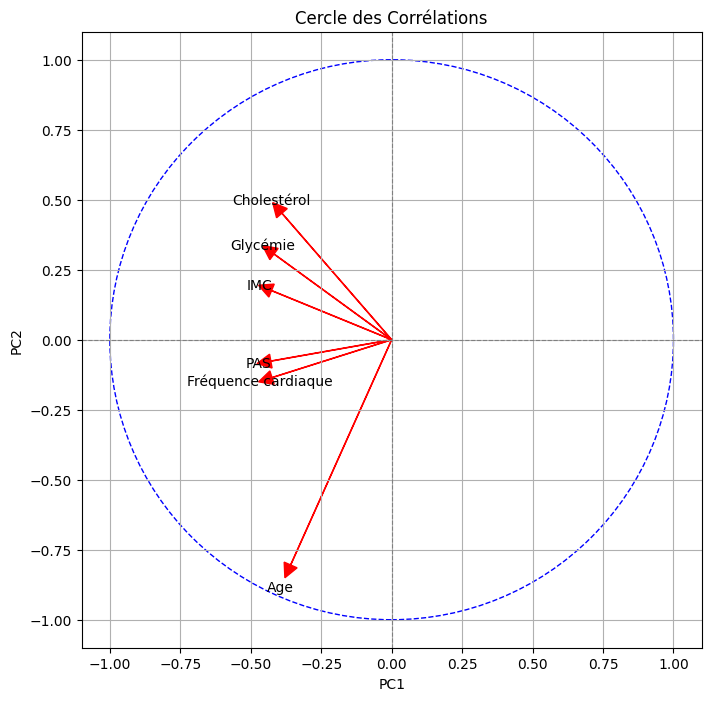

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initial data
data = {
    "Patient": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 54, 67, 36, 50, 43, 39, 61, 48, 53],
    "IMC": [24.5, 27.8, 26.5, 22.0, 29.0, 25.0, 23.5, 28.0, 24.5, 27.0],
    "Cholestérol": [220, 240, 210, 180, 250, 190, 200, 260, 195, 230],
    "PAS": [130, 145, 150, 120, 160, 135, 125, 155, 140, 145],
    "Fréquence cardiaque": [72, 78, 80, 70, 82, 75, 73, 85, 76, 79],
    "Glycémie": [90, 105, 98, 85, 115, 92, 88, 110, 100, 104]
}

# Create a DataFrame
A = pd.DataFrame(data)

# Exclude the "Patient" column
A_numeric = A.iloc[:, 1:]

# Center and standardize the data
A_centered = A_numeric - np.mean(A_numeric, axis=0)
A_standardized = A_centered / np.std(A_centered, axis=0)

# Convert DataFrame to NumPy array
A_standardized = A_standardized.to_numpy()

# Correlation matrix
corr_matrix = np.corrcoef(A_standardized, rowvar=False)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Contribution of variables to the first two components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]

# Circle of correlations plot
plt.figure(figsize=(8, 8))
circle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Plot each variable as an arrow
for i, variable in enumerate(A_numeric.columns):
    plt.arrow(0, 0, pc1[i], pc2[i], head_width=0.05, head_length=0.05, color='red')
    plt.text(pc1[i] * 1.1, pc2[i] * 1.1, variable, color='black', ha='center', va='center')

# Format plot
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')
plt.axvline(0, color='gray', linewidth=0.8, linestyle='--')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Cercle des Corrélations")
plt.grid()
plt.show()


In [3]:
import numpy as np

# Données initiales
A = np.array([[4, 5],
              [6, 7],
              [8, 0]])

# Matrice centrée réduite (Z)
Z = (A - np.mean(A, axis=0)) / np.std(A, axis=0)

# Calcul des composantes principales (C)
corr_matrix = np.corrcoef(Z, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)
C = np.dot(Z, eigenvectors)

# Contributions des axes (% d'inertie)
inertie_axes = eigenvalues / np.sum(eigenvalues) * 100

# Contributions des individus (CTR)
n = Z.shape[0]  # nombre d'individus
ctr = np.zeros_like(C)
for j in range(C.shape[1]):
    ctr[:, j] = (C[:, j]**2) / (n * eigenvalues[j])

print("Inertie expliquée par axe (%):")
for i, inertie in enumerate(inertie_axes):
    print(f"Axe {i+1}: {inertie:.2f}%")

print("\nContributions des individus (CTR):")
for i in range(n):
    print(f"Individu {i+1}: {ctr[i]}")

Inertie expliquée par axe (%):
Axe 1: 84.67%
Axe 2: 15.33%

Contributions des individus (CTR):
Individu 1: [0.2408833  0.42578337]
Individu 2: [0.10220825 0.56445842]
Individu 3: [0.65690845 0.00975822]
